In [4]:
import numpy as np
import os
import pickle
from time import time
import pdspy.modeling as modeling
import pdspy.dust as dust
import matplotlib.pyplot as plt

In [5]:
param_names = ["Tstar","logLstar","logMdisk","logRdisk","h0","logRin",\
          "gamma","beta","logMenv","logRenv","fcav","ksi","logamax","p","incl"]
ranges = [[3000.,5000.], [-1,3.],[-8.,-2.], [0.,3.],[0.01,0.5], [-1.,2.5], [0.0,1.999], \
          [0.5,2.0],[-8.,-2.],[2.5,4.], [0.,1.], [0.5,1.5], [0.,5.], [2.5,4.5], [0.,90.]]
new_param_names = ["T_star","logL_star","logM_disk","logR_disk","h_0","logR_in",\
               "gamma_trans","bi_x","logM_env_trans","logR_env","f_cav","ksi","loga_max","p","bi_y"]
new_ranges = [[3000.,5000.], [-1,3.],[-8.,-2.], [0.,3.],[0.01,0.5], [-1.,2.5], [np.log10(0.101),np.log10(2.1)], \
          [0,2],[np.log10(0.5),np.log10(6.5)],[2.5,4.], [0.,1.], [0.5,1.5], [0.,5.], [2.5,4.5], [-1.25,0.75]]

In [6]:
def orig_to_trans(pars):
    gamma=pars[6]
    logM_env=pars[8]
    beta=pars[7]
    incl=pars[14]
    
    pars[6]=np.log10(2.1-1*gamma)
    pars[8]=np.log10(-1.5-1*logM_env)
    
    s=np.sin(0.7)
    c=np.cos(0.7)
    
    pars[7]=1-np.cos(((beta*c) + (incl*s/60)-.5)*np.pi/2)
    pars[14]=(-beta*s) + (incl*c/60)
    return pars

def trans_to_orig(pars):
    gamma_trans=pars[6]
    logM_env_trans=pars[8]
    bi_x=pars[7]
    bi_y=pars[14]
    
    pars[6]=2.1 - 10**gamma_trans
    pars[8]=-1.5 - 10**logM_env_trans
    
    s=np.sin(0.7)
    c=np.cos(0.7)
    
    pars[7]=round((1/(c+(s**2/c)))*((2/np.pi)*np.arccos(1-bi_x)+0.5-(s/c)*bi_y),14)
    pars[14]=round((60*s)*((2/np.pi)*np.arccos(1-bi_x)+0.5+(c/s)*bi_y),14)
    return pars

In [28]:
with open ('./etgrid/raw_coords_bypoint.txt', 'rb') as fp:
    raw_coords_bypoint = pickle.load(fp)
    
good_trans=[]
good_orig=[]
    
for i in range(len(raw_coords_bypoint)):
    point=raw_coords_bypoint[i]
    add=True
    for j in (0,1,3,9,10,13):
        if not new_ranges[j][0]<=point[j]<=new_ranges[j][1]:
            add=False
    origpoint=trans_to_orig(point)
    if not 0.5<=origpoint[7]<=2.0:
        add=False
    if not 0<=origpoint[14]<=90:
        add=False
    if add==True:
        good_trans.append(point)
        good_orig.append(origpoint)


In [47]:
np.log10(0.101)

-0.9956786262173574

In [48]:
np.log10(2.1)

0.3222192947339193

In [44]:
cba=np.transpose(raw_coords_bypoint)

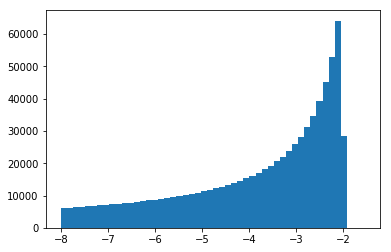

In [49]:
plt.hist(cba[8],bins=50)
plt.show()

In [43]:
np.set_printoptions(suppress=True)

point=good_trans[0]
for i in range(15):
    print(new_param_names[i]+" "+str(new_ranges[i])+" "+str(point[i]))
    
print(" ")
origpoint=trans_to_orig(point)
for i in range(15):
    print(param_names[i]+" "+str(ranges[i])+" "+str(origpoint[i]))

T_star [3000.0, 5000.0] 4432.195202468358
logL_star [-1, 3.0] 0.20040662094147477
logM_disk [-8.0, -2.0] -2.7955547447131863
logR_disk [0.0, 3.0] 2.2092829940782126
h_0 [0.01, 0.5] 0.18675498062249232
logR_in [-1.0, 2.5] -0.05066482352194468
gamma_trans [-0.9956786262173574, 0.3222192947339193] -8.472212079901382
bi_x [0, 2] -47.74410392841109
logM_env_trans [-0.3010299956639812, 0.8129133566428556] -1.5013863289291351
logR_env [2.5, 4.0] 3.467312967304573
f_cav [0.0, 1.0] 0.6279678950085203
ksi [0.5, 1.5] 0.8748122190274045
loga_max [0.0, 5.0] 0.8780339546967673
p [2.5, 4.5] 3.6201355287856796
bi_y [-1.25, 0.75] 3562.764830357745
 
Tstar [3000.0, 5000.0] 4432.195202468358
logLstar [-1, 3.0] 0.20040662094147477
logMdisk [-8.0, -2.0] -2.7955547447131863
logRdisk [0.0, 3.0] 2.2092829940782126
h0 [0.01, 0.5] 0.18675498062249232
logRin [-1.0, 2.5] -0.05066482352194468
gamma [0.0, 1.999] 2.0999999966287737
beta [0.5, 2.0] nan
logMenv [-8.0, -2.0] -1.5315219932042203
logRenv [2.5, 4.0] 3.467

/users/eteng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in arccos
  del sys.path[0]
/users/eteng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in arccos
  


In [32]:
arr=(np.transpose(np.array(good_trans)))
print(arr.shape)

(15, 4051)


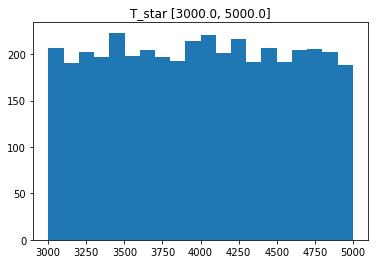

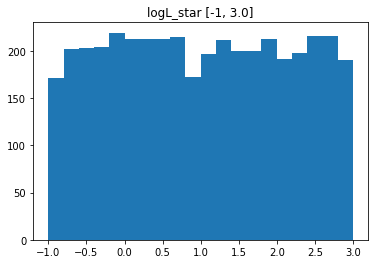

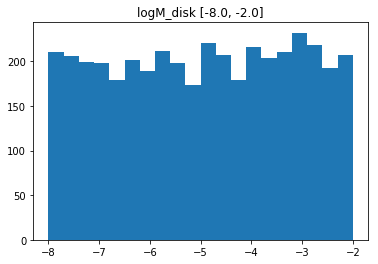

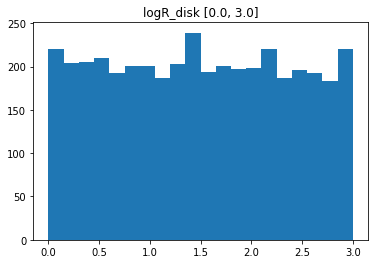

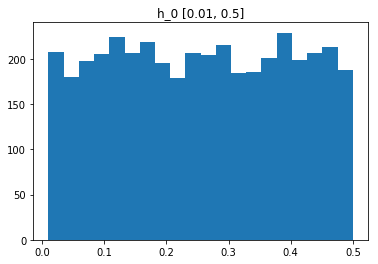

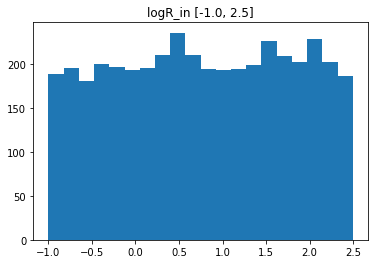

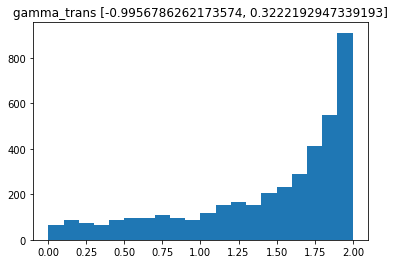

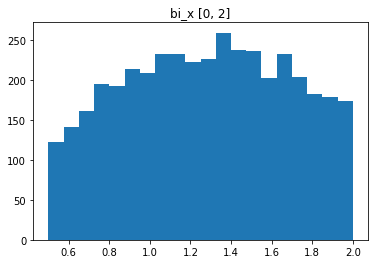

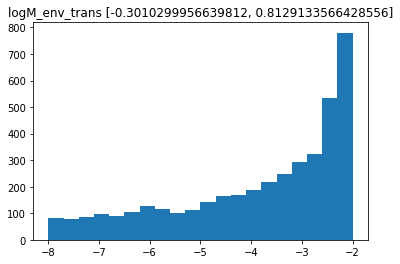

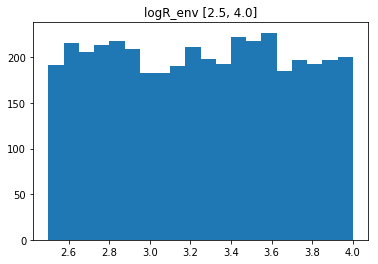

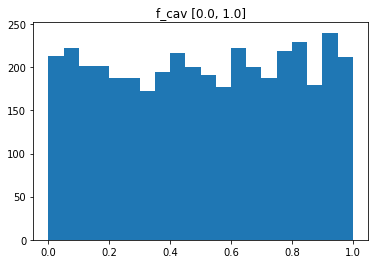

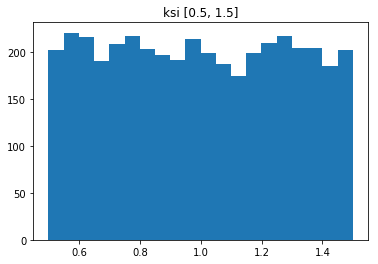

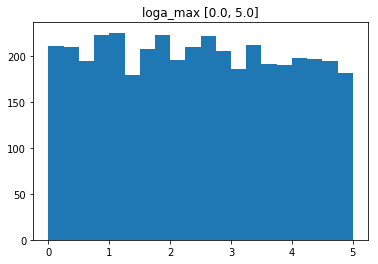

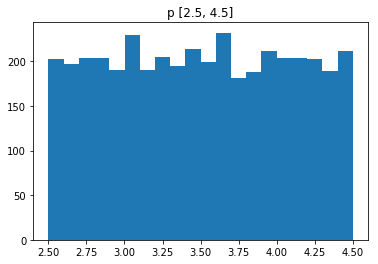

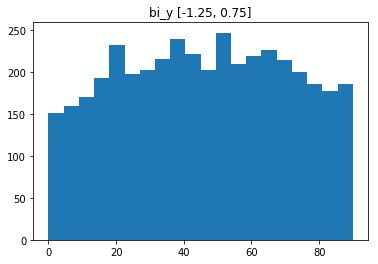

In [35]:
for i in range(len(arr)):
    plt.hist(arr[i],bins=20)
    plt.title(new_param_names[i]+" "+str(new_ranges[i]))
    plt.show()